In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',100)

basket_df = pd.read_csv("Trans_by_Basket_50000_Cust.csv") 
basket_df = basket_df.drop(columns = ['basket_id.1','time_id.1','cust_id.1','store_id.1',])

X = basket_df[['store_id','std_quantity','nunique_products',
              'n_products','sum_spend','cust_price_sensitivity',
              'cust_lifestage','basket_size', 'basket_price_sensitivity',
             'basket_type','basket_dominant_mission','store_format','store_region']]

X['cust_lifestage'].fillna('OT')


#Groupby Customer
scaler = StandardScaler()

# Need to Dummy my variables first

X_cat = X[['cust_price_sensitivity',
              'cust_lifestage','basket_size', 'basket_price_sensitivity',
             'basket_type','basket_dominant_mission','store_format']]
X_num = X[['std_quantity','nunique_products','n_products','sum_spend']]

X_dum = pd.get_dummies(X_cat)
#X_num_scale = pd.DataFrame(scaler.fit_transform(X_num),columns=['std_quantity','nunique_products','n_products','sum_spend'])
           
X_all = pd.concat([X_num,X_dum],axis=1)

In [50]:
X_all = pd.concat([basket_df['cust_id'],X_all],axis=1)

X_all.head()

,cust_id,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity_LA,cust_price_sensitivity_MM,cust_price_sensitivity_UM,cust_price_sensitivity_XX,cust_lifestage_OA,cust_lifestage_OF,cust_lifestage_OT,cust_lifestage_PE,cust_lifestage_YA,cust_lifestage_YF,basket_size_L,basket_size_M,basket_size_S,basket_price_sensitivity_LA,basket_price_sensitivity_MM,basket_price_sensitivity_UM,basket_price_sensitivity_XX,basket_type_Full Shop,basket_type_Small Shop,basket_type_Top Up,basket_type_XX,basket_dominant_mission_Fresh,basket_dominant_mission_Grocery,basket_dominant_mission_Mixed,basket_dominant_mission_Nonfood,basket_dominant_mission_XX,store_format_LS,store_format_MS,store_format_SS,store_format_XLS
0,CUST0000999786,0.0,1,1,1.66,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,CUST0000999786,0.0,3,3,4.03,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,CUST0000999786,0.0,2,2,1.89,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,CUST0000999786,0.0,1,1,0.98,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,CUST0000999786,0.0,1,1,0.67,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [51]:
X_all_cust_grp = X_all.groupby('cust_id').sum()
X_all_cust_grp.head(10)

,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity_LA,cust_price_sensitivity_MM,cust_price_sensitivity_UM,cust_price_sensitivity_XX,cust_lifestage_OA,cust_lifestage_OF,cust_lifestage_OT,cust_lifestage_PE,cust_lifestage_YA,cust_lifestage_YF,basket_size_L,basket_size_M,basket_size_S,basket_price_sensitivity_LA,basket_price_sensitivity_MM,basket_price_sensitivity_UM,basket_price_sensitivity_XX,basket_type_Full Shop,basket_type_Small Shop,basket_type_Top Up,basket_type_XX,basket_dominant_mission_Fresh,basket_dominant_mission_Grocery,basket_dominant_mission_Mixed,basket_dominant_mission_Nonfood,basket_dominant_mission_XX,store_format_LS,store_format_MS,store_format_SS,store_format_XLS
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CUST0000870644,120.478510,1423,1986,1749.79,163.0,0.0,0.0,0.0,0.0,0.0,163.0,0.0,0.0,0.0,103.0,48.0,12.0,112.0,46.0,3.0,2.0,14.0,35.0,112.0,2.0,72.0,28.0,61.0,0.0,2.0,0.0,163.0,0.0,0.0
CUST0000870653,14.937619,231,304,449.34,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,12.0,12.0,3.0,10.0,16.0,1.0,0.0,7.0,13.0,7.0,0.0,15.0,2.0,7.0,3.0,0.0,25.0,2.0,0.0,0.0
CUST0000871069,0.000000,7,7,15.76,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
CUST0000871519,6.637425,62,86,106.14,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,0.0,1.0,4.0,5.0,0.0,0.0,6.0,4.0,0.0,3.0,2.0,5.0,0.0,0.0,1.0,9.0,0.0,0.0
CUST0000871609,89.622862,890,1200,1068.16,0.0,0.0,162.0,0.0,162.0,0.0,0.0,0.0,0.0,0.0,54.0,60.0,48.0,7.0,62.0,90.0,3.0,3.0,95.0,63.0,1.0,105.0,15.0,31.0,10.0,1.0,9.0,153.0,0.0,0.0
CUST0000871850,5.988613,97,120,214.04,0.0,0.0,23.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,9.0,2.0,10.0,10.0,1.0,1.0,18.0,3.0,1.0,9.0,7.0,6.0,0.0,1.0,0.0,9.0,7.0,7.0
CUST0000872127,3.625664,16,31,26.26,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
CUST0000872164,17.828052,318,441,656.72,27.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,17.0,8.0,2.0,1.0,22.0,3.0,1.0,4.0,4.0,19.0,0.0,21.0,1.0,4.0,1.0,0.0,1.0,0.0,26.0,0.0
CUST0000872220,103.732236,427,833,817.90,0.0,61.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,49.0,9.0,3.0,11.0,29.0,21.0,0.0,7.0,9.0,45.0,0.0,4.0,33.0,23.0,1.0,0.0,0.0,61.0,0.0,0.0


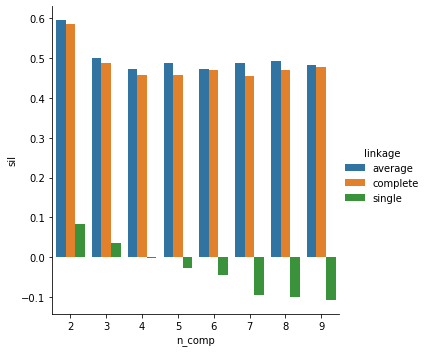

In [52]:
import itertools

#X_all_cust_grp.drop(columns='cust_id')

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_all_cust_grp_scale = pd.DataFrame(scaler.fit_transform(X_all_cust_grp),
                                    columns=X_all_cust_grp.columns)

agg_model_list = [ AgglomerativeClustering(affinity = 'cosine', linkage = linkage, 
                  n_clusters = number).fit(X_all_cust_grp_scale) for linkage,number in model_iterator]

agg_model_sil_list = [silhouette_score(X_all_cust_grp_scale,model.labels_, metric = 'cosine') for model in agg_model_list]

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

agg_model_all_df = pd.DataFrame(model_iterator, columns =['linkage','n_comp'])

agg_model_all_df['sil'] = agg_model_sil_list 

sns.catplot(x='n_comp',y='sil', hue= 'linkage',data=agg_model_all_df,kind='bar')

In [56]:
best_agg_model = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', 
                  n_clusters = 2).fit(X_all_cust_grp_scale) 

X_zero = X_all_cust_grp_scale.iloc[best_agg_model.labels_==0]

X_one = X_all_cust_grp_scale.iloc[best_agg_model.labels_==1]

#X_two = X_all_cust_grp.iloc[best_agg_model.labels_==2]

#print(X_zero.describe().T)

#print(X_one.describe().T)

print(X_zero.describe().T - X_one.describe().T)

                                 count      mean       std       min  \
std_quantity                    -109.0  1.351078  0.948120  0.000000   
nunique_products                -109.0  1.448858  0.917545  0.117331   
n_products                      -109.0  1.449299  0.907507  0.187494   
sum_spend                       -109.0  1.449377  0.898598  0.066004   
cust_price_sensitivity_LA       -109.0  0.565891  1.292382  0.000000   
cust_price_sensitivity_MM       -109.0  0.809360  1.176210  0.000000   
cust_price_sensitivity_UM       -109.0  0.670513  1.308510  0.000000   
cust_price_sensitivity_XX       -109.0 -0.441822 -1.276919  0.000000   
cust_lifestage_OA               -109.0  0.525293  1.340758  0.000000   
cust_lifestage_OF               -109.0  0.261825  1.400779  0.000000   
cust_lifestage_OT               -109.0  0.607245  1.295527  0.000000   
cust_lifestage_PE               -109.0  0.354013  1.325103  0.000000   
cust_lifestage_YA               -109.0  0.490548  1.255236  0.00

In [57]:
X_all_cust_grp.describe()

,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity_LA,cust_price_sensitivity_MM,cust_price_sensitivity_UM,cust_price_sensitivity_XX,cust_lifestage_OA,cust_lifestage_OF,cust_lifestage_OT,cust_lifestage_PE,cust_lifestage_YA,cust_lifestage_YF,basket_size_L,basket_size_M,basket_size_S,basket_price_sensitivity_LA,basket_price_sensitivity_MM,basket_price_sensitivity_UM,basket_price_sensitivity_XX,basket_type_Full Shop,basket_type_Small Shop,basket_type_Top Up,basket_type_XX,basket_dominant_mission_Fresh,basket_dominant_mission_Grocery,basket_dominant_mission_Mixed,basket_dominant_mission_Nonfood,basket_dominant_mission_XX,store_format_LS,store_format_MS,store_format_SS,store_format_XLS
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,44.266653,518.727559,753.462992,961.711764,21.371654,32.114961,24.952756,0.300787,12.634646,5.672441,25.236220,4.651969,11.314961,10.373228,26.414173,31.296063,21.029921,16.752756,39.664567,20.973228,1.349606,9.141732,43.040945,25.505512,1.051969,41.152756,13.269291,19.042520,4.223622,1.051969,46.214173,17.335433,9.365354,5.825197
std,64.291777,707.959288,1024.838718,1297.310613,72.237039,74.314858,73.861331,1.163014,50.860873,46.222509,75.753258,25.587423,42.626413,51.345839,37.518367,54.992806,38.078709,31.579807,56.941826,38.887984,3.471921,18.124406,73.219269,38.665449,4.662977,62.387112,24.761797,27.014888,8.687190,4.662977,78.809506,51.827358,56.302266,30.120148
min,0.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,29.000000,40.500000,55.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,16.444565,217.000000,315.000000,389.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,11.000000,7.000000,4.000000,19.000000,5.000000,0.000000,1.000000,15.000000,8.000000,0.000000,18.000000,5.000000,9.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000
75%,58.757951,721.500000,1096.000000,1375.795000,0.000000,21.500000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,39.500000,39.000000,24.000000,19.000000,56.000000,24.000000,1.000000,9.000000,51.000000,35.000000,1.000000,57.000000,15.000000,28.000000,4.000000,1.000000,61.500000,7.000000,1.000000,0.000000
max,373.669543,4017.000000,5781.000000,7709.180000,926.000000,709.000000,745.000000,14.000000,492.000000,745.000000,926.000000,335.000000,468.000000,684.000000,230.000000,505.000000,390.000000,314.000000,470.000000,343.000000,37.000000,107.000000,760.000000,302.000000,92.000000,499.000000,321.000000,218.000000,79.000000,92.000000,704.000000,485.000000,920.000000,463.000000


In [58]:
#Let's look at X_one

print(X_zero.shape)
print(X_one.shape)

(263, 34)
(372, 34)


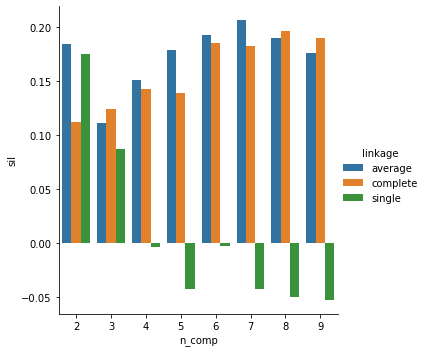

In [60]:
# Secondary Clustering on Group 0

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#X_all_cust_grp_scale = pd.DataFrame(scaler.fit_transform(X_all_cust_grp),
                                    #columns=X_all_cust_grp.columns)

agg_model_list = [ AgglomerativeClustering(affinity = 'cosine', linkage = linkage, 
                  n_clusters = number).fit(X_zero) for linkage,number in model_iterator]

agg_model_sil_list = [silhouette_score(X_zero,model.labels_, metric = 'cosine') for model in agg_model_list]

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

agg_model_all_df = pd.DataFrame(model_iterator, columns =['linkage','n_comp'])

agg_model_all_df['sil'] = agg_model_sil_list 

sns.catplot(x='n_comp',y='sil', hue= 'linkage',data=agg_model_all_df,kind='bar')

In [63]:
best_agg_model = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', 
                  n_clusters = 7).fit(X_zero) 

X_zero_0 = X_zero.iloc[best_agg_model.labels_==0]

X_zero_1 = X_zero.iloc[best_agg_model.labels_==1]

X_zero_2 = X_zero.iloc[best_agg_model.labels_==2]

X_zero_3 = X_zero.iloc[best_agg_model.labels_==3]

X_zero_4 = X_zero.iloc[best_agg_model.labels_==4]

X_zero_5 = X_zero.iloc[best_agg_model.labels_==5]

X_zero_6 = X_zero.iloc[best_agg_model.labels_==6]

print(X_zero_0.shape)
print(X_zero_1.shape)
print(X_zero_2.shape)
print(X_zero_3.shape)
print(X_zero_4.shape)
print(X_zero_5.shape)
print(X_zero_6.shape)

(39, 34)
(38, 34)
(26, 34)
(21, 34)
(114, 34)
(9, 34)
(16, 34)


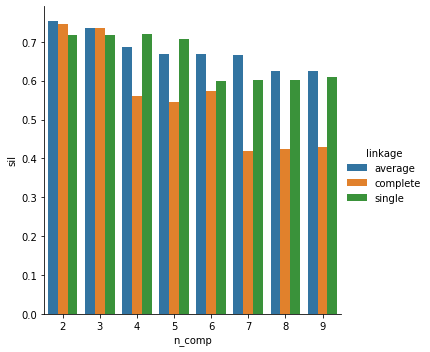

In [61]:
# Secondary Clustering on Group 1

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#X_all_cust_grp_scale = pd.DataFrame(scaler.fit_transform(X_all_cust_grp),
                                    #columns=X_all_cust_grp.columns)

agg_model_list = [ AgglomerativeClustering(affinity = 'cosine', linkage = linkage, 
                  n_clusters = number).fit(X_one) for linkage,number in model_iterator]

agg_model_sil_list = [silhouette_score(X_one,model.labels_, metric = 'cosine') for model in agg_model_list]

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

agg_model_all_df = pd.DataFrame(model_iterator, columns =['linkage','n_comp'])

agg_model_all_df['sil'] = agg_model_sil_list 

sns.catplot(x='n_comp',y='sil', hue= 'linkage',data=agg_model_all_df,kind='bar')

In [70]:
best_agg_model = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', 
                  n_clusters = 5).fit(X_one) 

X_one_0 = X_one.iloc[best_agg_model.labels_==0]

X_one_1 = X_one.iloc[best_agg_model.labels_==1]

X_one_2 = X_one.iloc[best_agg_model.labels_==2]

print(X_one_0.shape)
print(X_one_1.shape)
print(X_one_2.shape)

(5, 34)
(4, 34)
(357, 34)
